<a href="https://colab.research.google.com/github/ejrtks1020/Deep_learning_library/blob/main/_6_1_%EC%BC%80%EB%9D%BC%EC%8A%A4_CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스 CNN Fashion MNIST

> 들여쓴 블록



#### module import

In [ ]:
%load_ext tensorboard

In [ ]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Input



### 데이터 로드 및 전처리

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()

x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

x_train = x_train / 255.
x_test  = x_test / 255.

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 모델 구성 및 컴파일
- 임의의 모델

In [ ]:
def build_model():
  model = Sequential()

  input = Input(shape = (28, 28, 1))
  output = Conv2D(filters = 32, kernel_size = (3, 3))(input)
  output = Conv2D(filters= 64, kernel_size = (3, 3))(output)
  output = Conv2D(filters = 64, kernel_size = (3, 3))(output)
  output = Flatten()(output)

  output = Dense(128, activation = 'relu')(output)
  output = Dense(64, activation = 'relu')(output)
  output = Dense(10, activation = 'softmax')(output)

  model = Model(inputs = [input], outputs = [output])

  model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['acc'])
  
  return model

model_1 = build_model()
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3965056   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256  

### 모델 학습
- 런타임 GPU로 설정

In [ ]:
hist_1 = model_1.fit(x_train, y_train,
                     epochs = 25, 
                     validation_split = 0.3,
                     batch_size = 128)

Epoch 1/25
329/329 [==============================] - 41s 29ms/step - loss: 0.5343 - acc: 0.8098 - val_loss: 0.4124 - val_acc: 0.8513
Epoch 2/25
329/329 [==============================] - 9s 27ms/step - loss: 0.3607 - acc: 0.8671 - val_loss: 0.3582 - val_acc: 0.8747
Epoch 3/25
329/329 [==============================] - 9s 27ms/step - loss: 0.3027 - acc: 0.8876 - val_loss: 0.3601 - val_acc: 0.8704
Epoch 4/25
329/329 [==============================] - 9s 27ms/step - loss: 0.2579 - acc: 0.9045 - val_loss: 0.3899 - val_acc: 0.8683
Epoch 5/25
329/329 [==============================] - 9s 27ms/step - loss: 0.2193 - acc: 0.9199 - val_loss: 0.4196 - val_acc: 0.8564
Epoch 6/25
329/329 [==============================] - 9s 27ms/step - loss: 0.1973 - acc: 0.9272 - val_loss: 0.3880 - val_acc: 0.8741
Epoch 7/25
329/329 [==============================] - 9s 27ms/step - loss: 0.1681 - acc: 0.9379 - val_loss: 0.4324 - val_acc: 0.8707
Epoch 8/25
329/329 [==============================] - 9s 27ms/step -

### 학습 결과 시각화

In [ ]:
hist_1.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

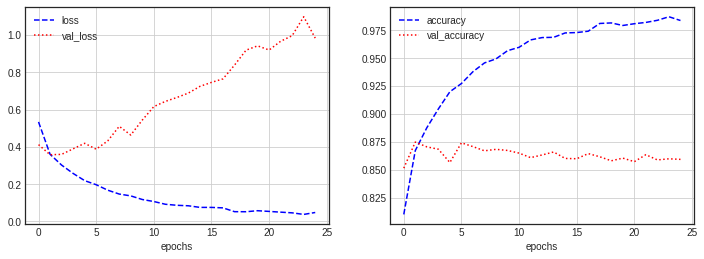

In [ ]:
plt.figure( figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_1.history['loss'], 'b--', label = 'loss')
plt.plot(hist_1.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel('epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_1.history['acc'], 'b--', label = 'accuracy')
plt.plot(hist_1.history['val_acc'], 'r:', label = 'val_accuracy')
plt.xlabel('epochs')
plt.grid()
plt.legend()
plt.show()

### 모델 평가

In [ ]:
model_1.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9943 - acc: 0.8580


[0.9942519664764404, 0.8579999804496765]

### 모델 재구성
- 학습 파라미터의 수 비교

In [ ]:
def build_model2():      # 맥스 풀링 , 드랍아웃 레이어 추가
  model = Sequential()

  input = Input(shape = (28, 28, 1))
  output = Conv2D(filters = 32, kernel_size = (3, 3))(input)
  output = MaxPool2D(strides = (2, 2))(output)
  output = Conv2D(filters= 64, kernel_size = (3, 3))(output)
  output = MaxPool2D(strides = (2, 2))(output)
  output = Conv2D(filters = 64, kernel_size = (3, 3))(output)
  output = MaxPool2D(strides = (2, 2))(output)
  output = Flatten()(output)

  output = Dense(128, activation = 'relu')(output)
  output = Dropout(0.3)(output)
  output = Dense(64, activation = 'relu')(output)
  output = Dropout(0.3)(output)
  output = Dense(10, activation = 'softmax')(output)

  model = Model(inputs = [input], outputs = [output])

  model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['acc'])
  
  return model

model_2 = build_model2()
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0   

### 모델 재학습

In [ ]:
hist_2 = model_2.fit(x_train, y_train,
                     epochs = 25, 
                     validation_split = 0.3,
                     batch_size = 128)

Epoch 1/25
329/329 [==============================] - 5s 12ms/step - loss: 0.8837 - acc: 0.6841 - val_loss: 0.5461 - val_acc: 0.8068
Epoch 2/25
329/329 [==============================] - 3s 10ms/step - loss: 0.5675 - acc: 0.7962 - val_loss: 0.4708 - val_acc: 0.8292
Epoch 3/25
329/329 [==============================] - 3s 10ms/step - loss: 0.4961 - acc: 0.8222 - val_loss: 0.4549 - val_acc: 0.8323
Epoch 4/25
329/329 [==============================] - 4s 11ms/step - loss: 0.4487 - acc: 0.8393 - val_loss: 0.4148 - val_acc: 0.8466
Epoch 5/25
329/329 [==============================] - 3s 10ms/step - loss: 0.4152 - acc: 0.8503 - val_loss: 0.3822 - val_acc: 0.8618
Epoch 6/25
329/329 [==============================] - 3s 11ms/step - loss: 0.3848 - acc: 0.8627 - val_loss: 0.3731 - val_acc: 0.8634
Epoch 7/25
329/329 [==============================] - 3s 10ms/step - loss: 0.3679 - acc: 0.8683 - val_loss: 0.3736 - val_acc: 0.8633
Epoch 8/25
329/329 [==============================] - 3s 10ms/step - 

In [ ]:
plt.figure( figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_2.history['loss'], 'b--', label = 'loss')
plt.plot(hist_2.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel('epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_2.history['acc'], 'b--', label = 'accuracy')
plt.plot(hist_2.history['val_acc'], 'r:', label = 'val_accuracy')
plt.xlabel('epochs')
plt.grid()
plt.legend()
plt.show()

### 모델 재평가

In [ ]:
model_2.evaluate(x_test, y_test)

## 모델 성능 높이기 - 많은 레이어 쌓기

In [ ]:
from tensorflow.keras.layers import BatchNormalization, ReLU

In [ ]:
def build_model3(): 
  model = Sequential()

  input = Input(shape = (28, 28, 1))
  output = Conv2D(filters = 32, kernel_size = 3, activation = 'relu', padding = 'same')(input)
  output = Conv2D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'valid')(output)
  output = MaxPool2D(strides = (2, 2))(output)
  output = Dropout(0.5)(output)
  
  output = Conv2D(filters = 128, kernel_size = 3, activation = 'relu', padding = 'same')(output)
  output = Conv2D(filters = 256, kernel_size = 3, activation = 'relu', padding = 'valid')(output)
  output = MaxPool2D(strides = (2, 2))(output)
  output = Dropout(0.5)(output)


  output = Flatten()(output)
  output = Dense(256, activation = 'relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(100, activation = 'relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(10, activation = 'softmax')(output)

  model = Model(inputs = [input], outputs = [output])

  model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['acc'])
  
  return model

model_3 = build_model3()
model_3.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 11, 11, 256)       2951

## 모델 학습 및 결과 시각화

In [ ]:
hist_3 = model_3.fit(x_train, y_train,
                     epochs = 25, 
                     validation_split = 0.3,
                     batch_size = 128)

Epoch 1/25
329/329 [==============================] - 13s 37ms/step - loss: 0.8509 - acc: 0.6954 - val_loss: 0.4293 - val_acc: 0.8444
Epoch 2/25
329/329 [==============================] - 11s 35ms/step - loss: 0.4724 - acc: 0.8334 - val_loss: 0.3319 - val_acc: 0.8811
Epoch 3/25
329/329 [==============================] - 11s 35ms/step - loss: 0.3877 - acc: 0.8659 - val_loss: 0.2916 - val_acc: 0.8919
Epoch 4/25
329/329 [==============================] - 11s 35ms/step - loss: 0.3534 - acc: 0.8757 - val_loss: 0.2671 - val_acc: 0.9025
Epoch 5/25
329/329 [==============================] - 11s 34ms/step - loss: 0.3262 - acc: 0.8855 - val_loss: 0.2589 - val_acc: 0.9046
Epoch 6/25
329/329 [==============================] - 11s 34ms/step - loss: 0.3039 - acc: 0.8931 - val_loss: 0.2477 - val_acc: 0.9094
Epoch 7/25
329/329 [==============================] - 11s 35ms/step - loss: 0.2868 - acc: 0.8970 - val_loss: 0.2408 - val_acc: 0.9119
Epoch 8/25
329/329 [==============================] - 11s 35ms

- 과적합은 되지 않았지만 층을 늘려도 좋은 성능을 낼 수 있음

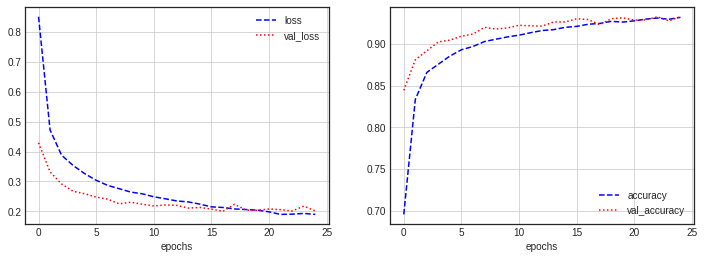

In [ ]:
plt.figure( figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_3.history['loss'], 'b--', label = 'loss')
plt.plot(hist_3.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel('epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_3.history['acc'], 'b--', label = 'accuracy')
plt.plot(hist_3.history['val_acc'], 'r:', label = 'val_accuracy')
plt.xlabel('epochs')
plt.grid()
plt.legend()
plt.show()

In [ ]:
model_3.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2156 - acc: 0.9268


[0.21557895839214325, 0.926800012588501]

## 모델 성능 높이기 - 이미지 보강(Image Augmentation)

- 주요 인자 참고: https://keras.io/ko/preprocessing/image/

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_generator = ImageDataGenerator(
    rotation_range = 10, #10도 회전
    zoom_range = 0.2, #확대
    shear_range = 0.6,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,       #수평 반전
    vertical_flip = False         #수직 반전
)

In [ ]:
augment_size = 200

In [ ]:
print(x_train.shape)
print(x_train[0].shape) 

(60000, 28, 28, 1)
(28, 28, 1)


In [ ]:
x_augment =  image_generator.flow(np.tile(x_train[0].reshape(28 * 28 * 1), augment_size).reshape(-1, 28, 28, 1),
                                  np.zeros(augment_size), batch_size = augment_size, shuffle = False).next()[0]

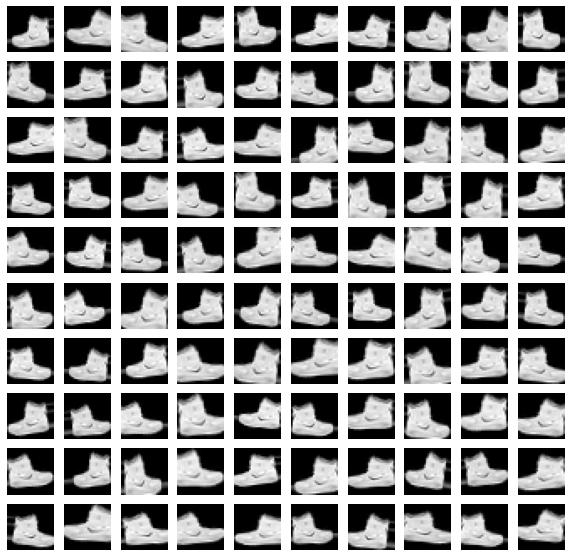

In [ ]:
plt.figure(figsize = (10, 10))
for i in range(1, 101):
  plt.subplot(10, 10, i)
  plt.axis('off')
  plt.imshow(x_augment[i-1].reshape(28,28), cmap = 'gray')

**같은 데이터로 조금씩 다른 데이터 생성**


데이터 추가

In [ ]:
image_generator = ImageDataGenerator(
    rotation_range = 15, #10도 회전
    zoom_range = 0.1, #확대
    shear_range = 0.6,
    width_shift_range = 0.15,
    height_shift_range = 0.1,
    horizontal_flip = True,       #수평 반전
    vertical_flip = False         #수직 반전
)

In [ ]:
augment_size = 30000

In [ ]:
random_mask = np.random.randint(x_train.shape[0], size =augment_size) #x_train중에서 augment_size만큼 랜덤하게 추출
x_augmented = x_train[random_mask].copy()
y_augmented = y_train[random_mask].copy()

In [ ]:
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size),
                                   batch_size = augment_size, shuffle = True).next()[0]

x_train = np.concatenate(x_train, x_augmented)
y_train = np.concatenate(y_train, y_augmneted)

print(x_train.shape)
print(y_train.shape)

## 모델 학습 및 결과 시각화

In [ ]:
model_4 = build_model3()
model_4.summary()

In [ ]:
hist_4 = model_4.fit(x_train, y_train,
                     epochs = 25,
                     validation_split = 0.3,
                     batch_size =128)

In [ ]:
plt.figure( figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_4.history['loss'], 'b--', label = 'loss')
plt.plot(hist_4.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel('epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_4.history['acc'], 'b--', label = 'accuracy')
plt.plot(hist_4.history['val_acc'], 'r:', label = 'val_accuracy')
plt.xlabel('epochs')
plt.grid()
plt.legend()
plt.show()

- 학습 인자를 이전과 다르게 주면서 학습하면 더 잘 나올것으로 판단

In [ ]:
model_4.evaluate(x_test,y_test)